## Aufgabe

- Erstelle eine Tabelle mit Python und SQLite
- Fülle diese Tabelle mit 10, 1000, 100000 Zeilen und lese dabei jeweils genau eine Zeile aus. Miss wie lange das Schreiben und das Lesen dauert. Visualisierte diese Zeiten.
- Führe vorige Teilaufgabe erneut aus, aber erzeuge diesmal auf der Spalte id einen Index.

In [1]:
import sqlite3
import datetime as dt
import time
import functools
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def create_table(primary_key, table_name):
    conn = sqlite3.connect('C:\\sqlite\\example.db')
    drop_table_sql = """DROP TABLE IF EXISTS """ + table_name + """;"""
    
    if (primary_key):
        create_table_sql = """CREATE TABLE IF NOT EXISTS """ + table_name + """ ( id integer PRIMARY KEY, name text NOT NULL );"""
    else :
        create_table_sql = """CREATE TABLE IF NOT EXISTS """ + table_name + """ ( id integer, name text NOT NULL );"""
    
    c = conn.cursor()
    c.execute(drop_table_sql)
    conn.commit()
    
    c = conn.cursor()
    c.execute(create_table_sql)
    conn.commit()
    conn.close()

In [3]:
def timer(func):
    @functools.wraps(func)
    def wrapper_timer(*args, **kwargs):
        start_time = time.perf_counter()
        func(*args, **kwargs)
        end_time = time.perf_counter()
        run_time = end_time - start_time
        return run_time
    return wrapper_timer

In [4]:
@timer
def insert_table(n_rows, table_name):
    conn = sqlite3.connect('C:\\sqlite\\example.db')
    sql_delete='''DELETE FROM ''' + table_name + ''';'''
    sql_insert = '''INSERT INTO ''' + table_name + ''' VALUES(1, 'a')'''
    sql_insert_temp = '''(##value1##, 'a')'''
    
    c = conn.cursor()
    c.execute(sql_delete)
    conn.commit()
    
    for i in range(2, n_rows + 1):
        sql_insert = sql_insert + ',' + sql_insert_temp.replace('##value1##', str(i))
    c.execute(sql_insert)
    conn.commit()
    conn.close()

In [5]:
@timer
def select_table(table_name):
    conn = sqlite3.connect('C:\\sqlite\\example.db')
    sql_select='''SELECT * FROM ''' + table_name + ''';'''
    
    c = conn.cursor()
    c.execute(sql_select)
    conn.close()

In [6]:
insert_with_index = []
insert_without_index = []
select_with_index = []
select_without_index = []
n_rows_list = [10, 1000, 10000, 30000, 50000, 70000, 100000]

create_table(primary_key = True, table_name = 'test_table')

for n_rows in n_rows_list:
    time_elapsed = insert_table(n_rows, table_name = 'test_table')
    insert_with_index.append(time_elapsed)
    
    time_elapsed = select_table(table_name = 'test_table')
    select_with_index.append(time_elapsed)
    
create_table(primary_key = False, table_name = 'test_table')

for n_rows in n_rows_list:
    time_elapsed = insert_table(n_rows, table_name = 'test_table')
    insert_without_index.append(time_elapsed)
    
    time_elapsed = select_table(table_name = 'test_table')
    select_without_index.append(time_elapsed)

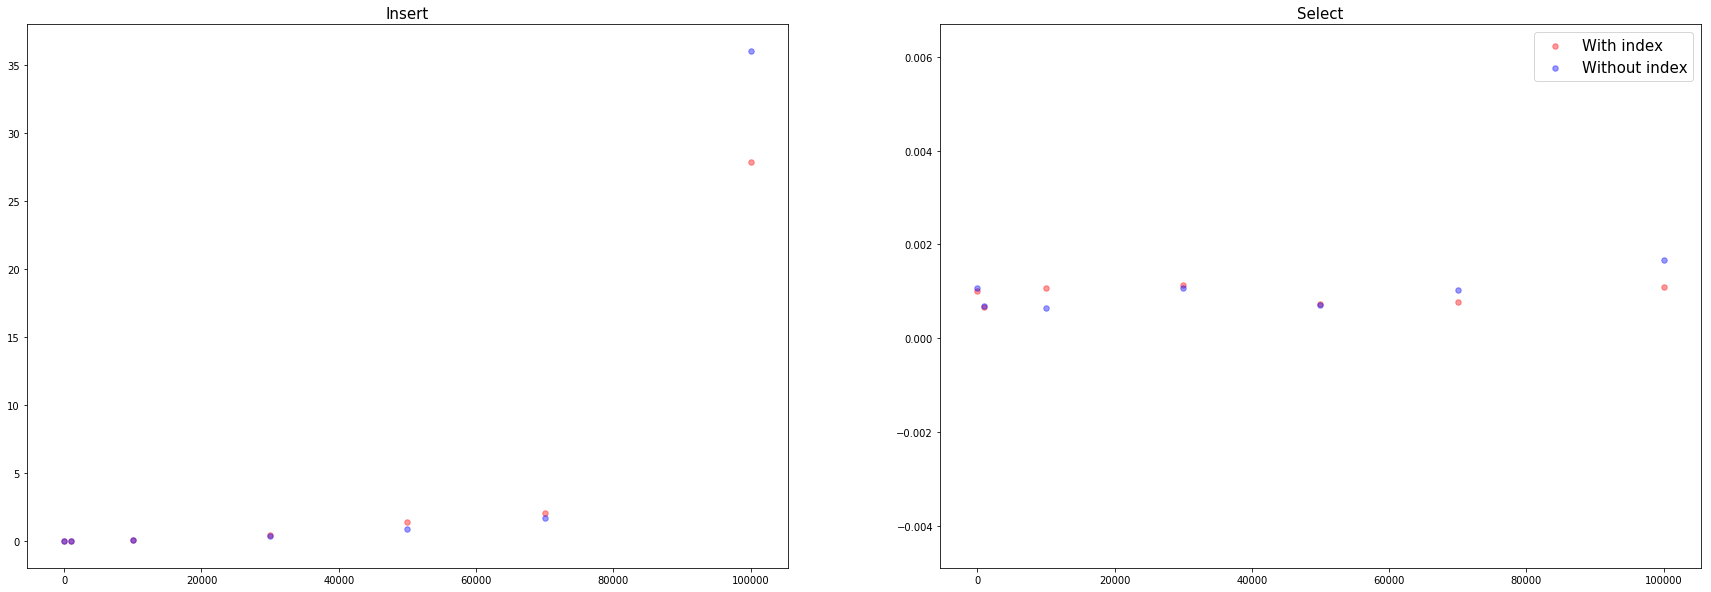

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(30)
fig.set_figheight(10)
size=30
a1 = ax1.scatter(n_rows_list, insert_with_index, color='red', alpha=0.4, s=size);
a2 = ax1.scatter(n_rows_list, insert_without_index, color='blue', alpha=0.4, s=size);
#ax1.title.set_text('Insert')
ax1.set_title('Insert', fontsize=15)
b1 = ax2.scatter(n_rows_list, select_with_index, color='red', alpha=0.4, s=size);
b2 = ax2.scatter(n_rows_list, select_without_index, color='blue', alpha=0.4, s=size);
#ax2.title.set_text('Select')
ax2.set_title('Select', fontsize=15)
plt.legend([b1, b2], ['With index', 'Without index'], fontsize=15);